
# Machine Learning Assignment #  
Adam Elias

## Standard Imports

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [91]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier

#Imports for Ensemble Learning and Random Forests
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

## Imports for Splitting Data and Building Pipeline


In [92]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [93]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

#newer ones for this unit
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [94]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [95]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [96]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_test.csv')

### Statistical and Visual Exploration

In [97]:
landsat_train.sample(10)

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
2395,76,94,94,72,76,89,90,68,72,81,...,67,75,87,89,67,75,83,89,71,4
2048,71,88,97,83,67,84,93,72,71,81,...,87,64,89,102,79,64,81,86,72,4
3723,51,83,104,83,48,75,96,75,48,72,...,75,46,73,90,75,49,73,86,79,1
34,88,98,106,83,84,102,106,83,88,111,...,87,79,99,100,79,88,95,100,79,3
1500,72,77,90,72,68,77,90,72,68,73,...,79,67,68,89,79,63,68,85,79,5
856,80,87,91,67,68,71,75,59,60,57,...,63,63,67,69,52,59,56,62,48,5
1642,95,113,122,92,95,113,112,89,95,113,...,90,93,111,114,90,97,115,114,90,3
2732,71,87,91,70,76,83,91,67,80,87,...,74,74,87,88,74,78,87,96,70,4
1354,75,81,93,79,56,45,105,105,49,37,...,87,80,89,98,72,64,62,94,83,2
3668,64,83,100,85,64,95,104,85,64,99,...,74,52,71,84,70,56,75,88,74,1


In [98]:
landsat_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


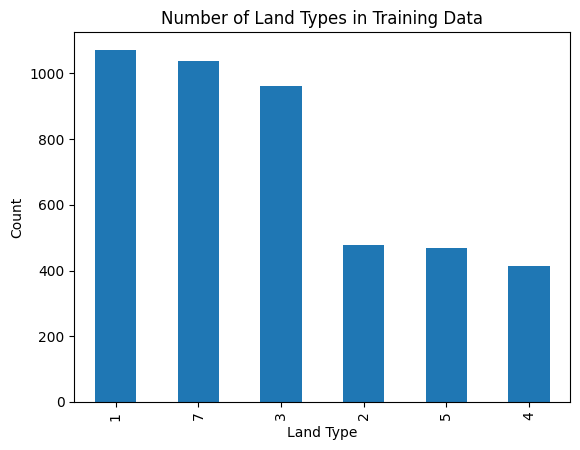

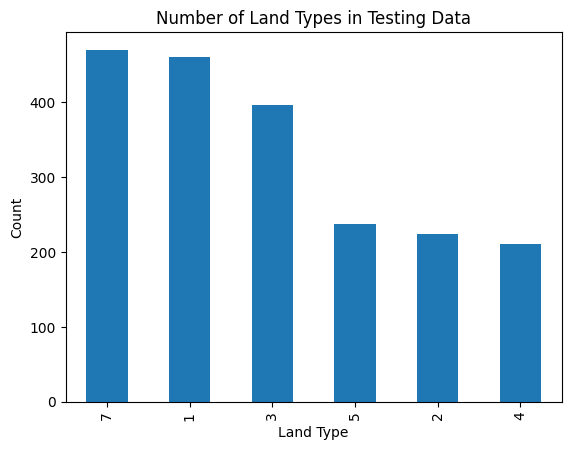

In [99]:
#Bar plot for landsat_train
landsat_train['land_type'].value_counts().plot(kind='bar')
plt.title('Number of Land Types in Training Data')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

#Bar plot for landsat_test
landsat_test['land_type'].value_counts().plot(kind='bar')
plt.title('Number of Land Types in Testing Data')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

### Splitting Data into Train/Test

In [100]:
X_train = landsat_train.drop('land_type', axis=1)
y_train = landsat_train['land_type']
X_test = landsat_test.drop('land_type', axis=1)
y_test = landsat_test['land_type']

### Building the Pipeline

In [101]:
num_attribs = X_train.columns

col_transform = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_attribs)
    ], remainder='passthrough')

random_forest = Pipeline(steps=[('preprocessor', col_transform),
                              ('classifier', RandomForestClassifier())])

### Executing the Model

In [102]:
random_forest.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'mi...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

### Evaluating Model

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.98      0.97      0.98       224
           3       0.88      0.95      0.92       397
           4       0.80      0.63      0.70       211
           5       0.93      0.89      0.91       237
           7       0.87      0.91      0.89       470

    accuracy                           0.91      2000
   macro avg       0.91      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



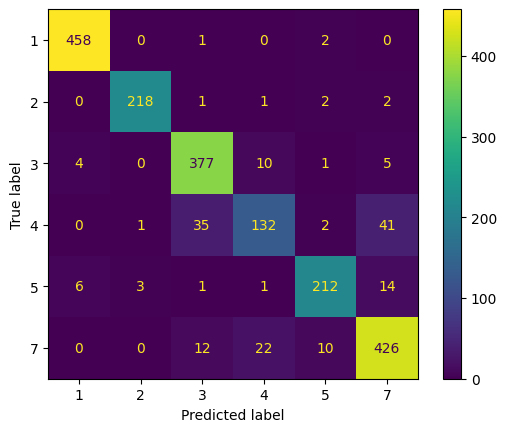

In [103]:
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

### Conclusion
The RandomForestClassifier seems to perform very well for predicting some land types--such as 1, 2, and 5--where the number of true positives (precision) is high and the false positives and false negatives are low. The classifier did not perform so well for land type 4, as it has a lower precision and recall score.  However, for the majority of land types, RandomForestClassifier seems to provide good predictive capabilities.

## Problem 2

### Reading the Data

Same as Problem 1

### Splitting Data into Train/Test

Already did in Problem 1

### Building the Pipeline

In [104]:
bagging = Pipeline([
                     ('transform', col_transform),
                     ('bagging',BaggingClassifier(DecisionTreeClassifier(),n_estimators=500, bootstrap=True, n_jobs=-1))
                     ])

### Executing the Model

In [105]:
bagging.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middl...
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('bagging',
                 BaggingClassifier(estimator=DecisionTreeClassifier(),
                                   n_estimators=500, n_jobs=-1))])

### Evaluating Model

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       461
           2       0.98      0.97      0.98       224
           3       0.87      0.94      0.90       397
           4       0.74      0.62      0.68       211
           5       0.93      0.86      0.90       237
           7       0.87      0.89      0.88       470

    accuracy                           0.90      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.90      0.90      0.90      2000



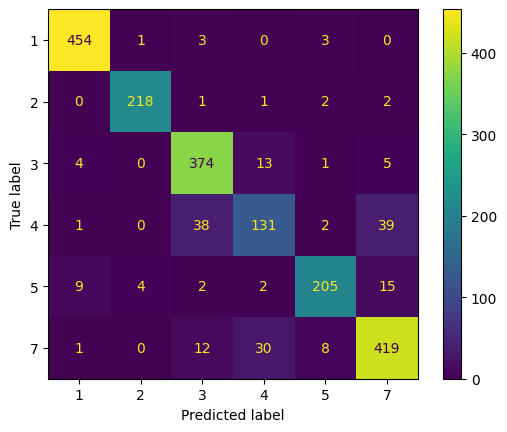

In [106]:
y_pred_bagging = bagging.predict(X_test)

print(classification_report(y_test, y_pred_bagging))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bagging)
plt.show()

### Conclusion
The Bagging classifier did a pretty good job in identifying different land types, especially for types 1 and 2, where it was almost perfect. However, it did slightly less well than the RandomForestClassifier with the given parameters, and it was less accurate for type 4 again, indicating that the model does not perform well on that land type. Overall, it's a solid approach but could use some tweaks to improve at recognizing the trickier land types.

## Problem 3

### Reading the Data

In [107]:
banknote_auth = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

###Statistical and Visual Exploration

In [108]:
banknote_auth.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


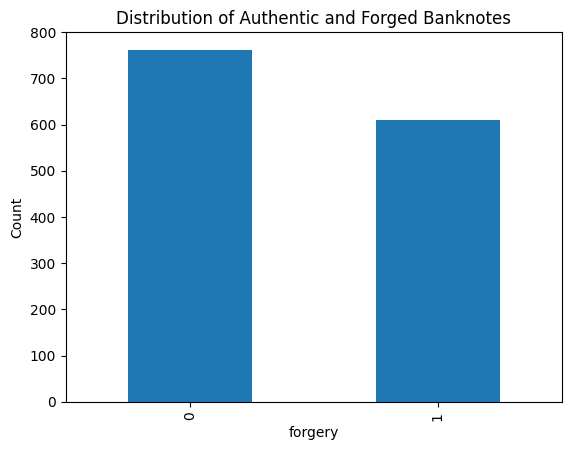

In [109]:
banknote_auth['forgery'].value_counts().plot(kind='bar')
plt.title('Distribution of Authentic and Forged Banknotes')
plt.xlabel('forgery')
plt.ylabel('Count')
plt.show()

### Splitting Data into Train/Test

In [110]:
X = banknote_auth.drop('forgery', axis=1)
y = banknote_auth['forgery']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [114]:
num_attribs = ['variance', 'skewness', 'curtosis', 'entropy']
cat_attribs = ['forgery']

col_transform = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_attribs)
    ], remainder='passthrough')

random_forest = Pipeline(steps=[('preprocessor', col_transform),
                              ('classifier', RandomForestClassifier())])

### Executing the Model

In [115]:
random_forest.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('classifier', RandomForestClassifier())])

### Evaluating the Model

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



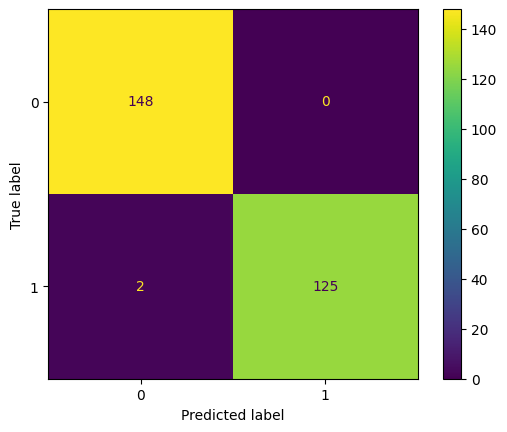

In [117]:
y_pred_rf = random_forest.predict(X_test)

print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.show()

### Conclusion
The RandomForestClassifier did an excellent job of predicting whether banknotes are authentic or forgeries.  It perfectly identified forgeries, and nearly perfectly identified all authentic notes, with only two incorrectly identified as forgeries when they were authentic.  This is a highly reliable model for distinguishing between authentic banknotes and forgeries.